## **La Ode Muhammad Yudhy Prayitno**
## *Informatics Engineering*
📍 Kota Kendari
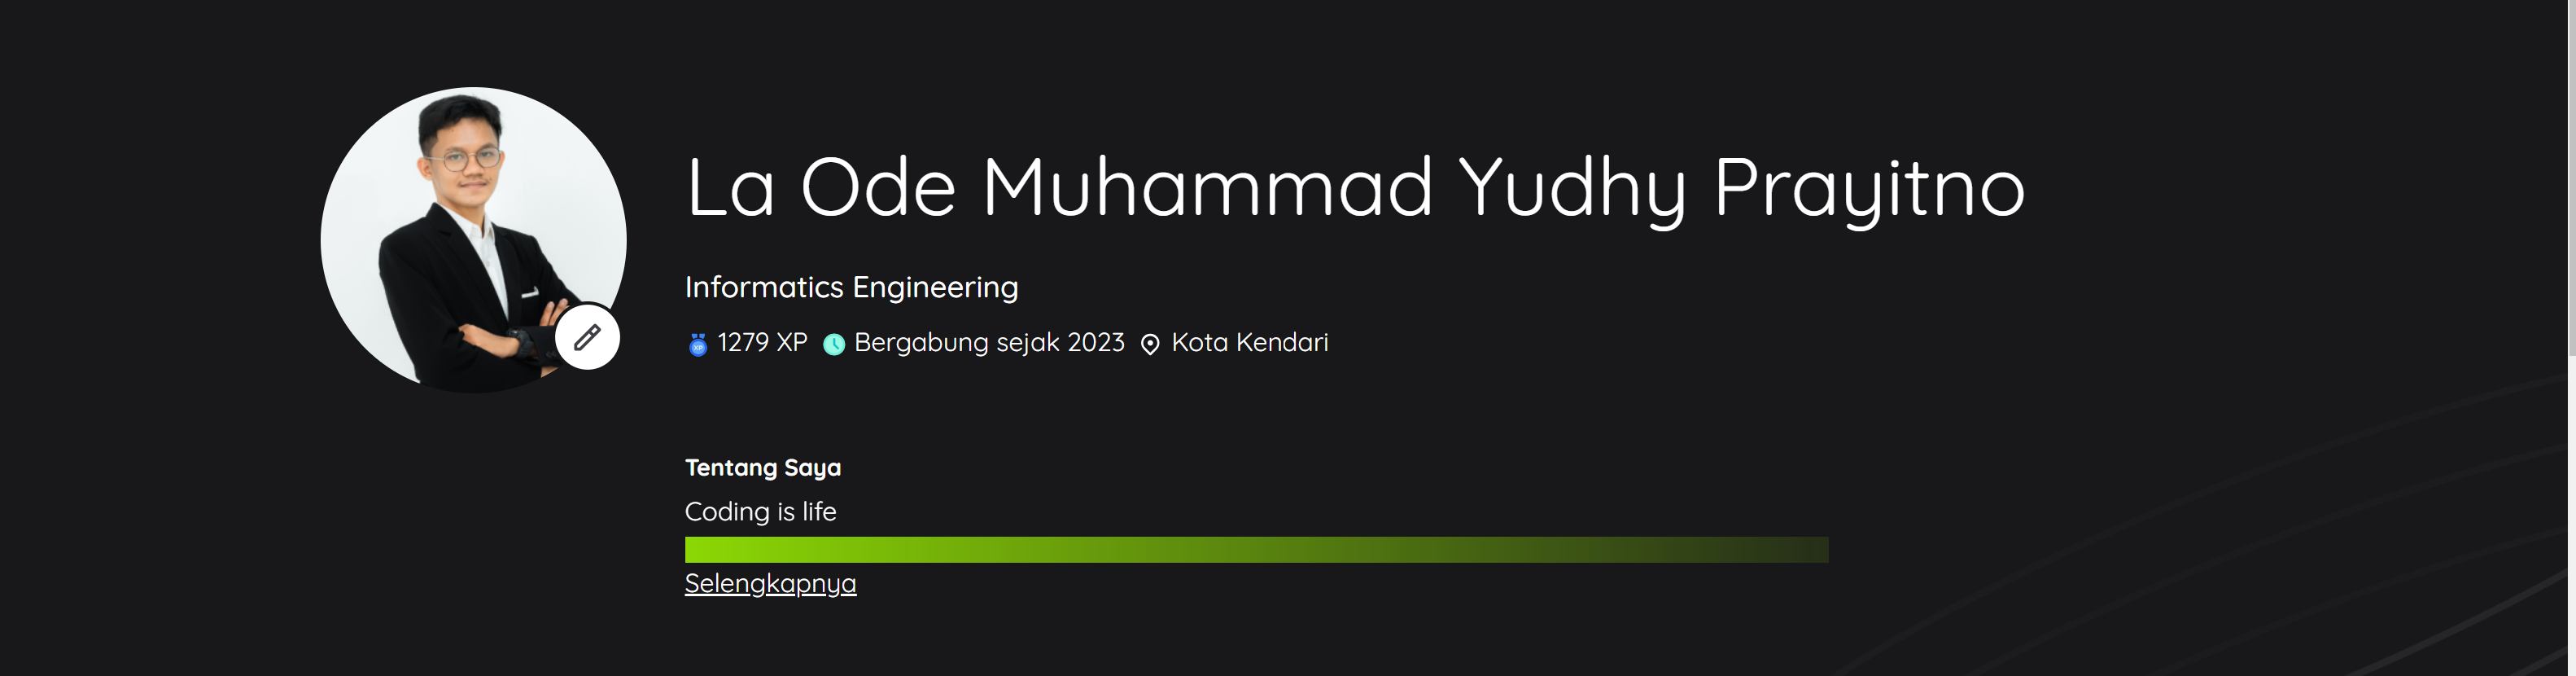

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Menggunakan wget untuk mendownload dataset
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip

# Mengekstrak dataset
!unzip rockpaperscissors.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: /content/__MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: /content/rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: /content/__MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: /content/rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: /content/__MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: /content/rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: /content/__MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: /content/rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: /content/__MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: /content/rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: /content/__MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: /conte

In [ ]:
import os

In [ ]:
base_dir = '/content/rockpaperscissors/rps-cv-images'
os.listdir(base_dir)

['README_rpc-cv-images.txt', 'rock', 'scissors', 'paper']

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='wrap',
    validation_split=0.4
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100,150),
    shuffle=True,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100,150),
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=32, #berapa batch yang akan dieksekusi pada setiap epoch
    epochs=20,
    validation_data=validation_generator, #menampilkan akurasi pengujian data validasi
    validation_steps=8, #berapa batch yang akan dieksekusi pada setiap epoch
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/20
32/32 - 9s - loss: 0.0440 - accuracy: 0.9839 - val_loss: 0.0609 - val_accuracy: 0.9922 - 9s/epoch - 276ms/step
Epoch 2/20
32/32 - 9s - loss: 0.0502 - accuracy: 0.9844 - val_loss: 0.1002 - val_accuracy: 0.9609 - 9s/epoch - 285ms/step
Epoch 3/20
32/32 - 9s - loss: 0.0619 - accuracy: 0.9728 - val_loss: 0.1547 - val_accuracy: 0.9531 - 9s/epoch - 289ms/step
Epoch 4/20
32/32 - 9s - loss: 0.0435 - accuracy: 0.9859 - val_loss: 0.2279 - val_accuracy: 0.9570 - 9s/epoch - 287ms/step
Epoch 5/20
32/32 - 9s - loss: 0.0265 - accuracy: 0.9912 - val_loss: 0.2559 - val_accuracy: 0.9648 - 9s/epoch - 276ms/step
Epoch 6/20
32/32 - 11s - loss: 0.0465 - accuracy: 0.9819 - val_loss: 0.2082 - val_accuracy: 0.9570 - 11s/epoch - 341ms/step


In [ ]:
import numpy as np
from google.colab import files
from  keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving scissors_test.png to scissors_test (4).png
1/1 [==============================] - 0s 35ms/step
scissors_test (4).png
scissors


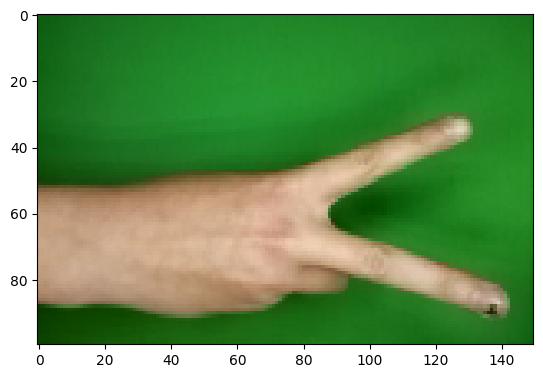

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')
